Can you describe the vibe of each Seattle neighborhood using listing descriptions?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('/Users/tangqi/Desktop/DSND_Term2-master/seattle/listings.csv')

Select the Columns that might be useful

In [2]:
df=df[['host_neighbourhood','price','zipcode','host_since']]

Clean the data

In [3]:
df['host_since']=pd.to_datetime(df['host_since'], errors='coerce')
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price']=pd.to_numeric(df['price'])

In [4]:
df['month']=df['host_since'].dt.month
df=df.groupby(['host_neighbourhood']).filter(lambda df : (df['host_neighbourhood'].count()>=100).any())
df=df.groupby(['host_neighbourhood','month']).mean()

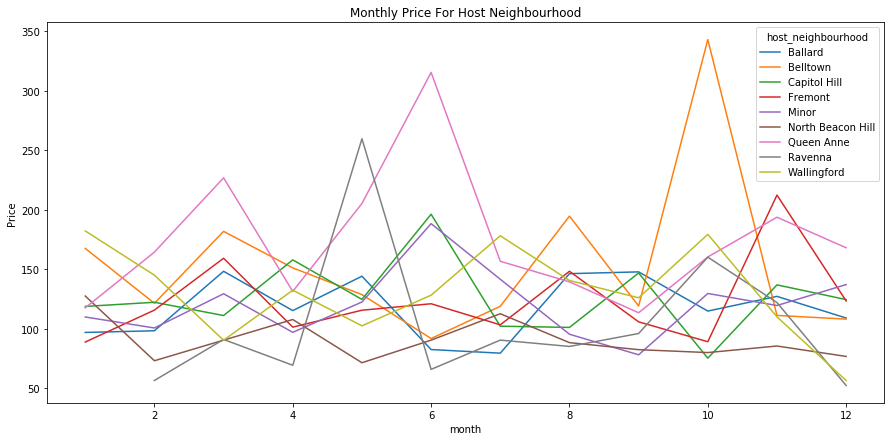

In [5]:
#Plot the data
fig, ax = plt.subplots(figsize=(15,7))
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly Price For Host Neighbourhood')
df.unstack('host_neighbourhood').loc[:, 'price'].plot(ax=ax)
plt.show()